## Student Performance Prediction

I found student performance data set in UCI machine learning repository <a href="https://archive.ics.uci.edu/ml/datasets/student+performance">here</a> and it has a note that prediction of final grade using factors other than prior grades will be helpful. This project is a quest to find any such factors.

The problem is a regression task to predict final grade

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import graphviz 
from graphviz import Source
import pydotplus
from IPython.display import Image 
import warnings
warnings.filterwarnings('ignore')
#from IPython.core.interactiveshell import InteractiveShell 
#InteractiveShell.ast_node_interactivity = "all"# prints every statement instead of just last one
import os

In [3]:
mathdata = pd.read_csv("Datasets\\StudentPerformancePrediction\\student-mat.csv", delimiter=';')
mathdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Columns description for student-mat.csv
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. sex - student's sex (binary: 'F' - female or 'M' - male) 
3. age - student's age (numeric: from 15 to 22) 
4. address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4  higher education) 
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 5th to 9th grade, 3 secondary education or 4  higher education) 
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16. schoolsup - extra educational support (binary: yes or no) 
17. famsup - family educational support (binary: yes or no) 
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. activities - extra-curricular activities (binary: yes or no) 
20. nursery - attended nursery school (binary: yes or no) 
21. higher - wants to take higher education (binary: yes or no) 
22. internet - Internet access at home (binary: yes or no) 
23. romantic - with a romantic relationship (binary: yes or no) 
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. health - current health status (numeric: from 1 - very bad to 5 - very good) 
30. absences - number of school absences (numeric: from 0 to 93) 
31. G1 - first period grade (numeric: from 0 to 20) 
31. G2 - second period grade (numeric: from 0 to 20) 
32. G3 - final grade (numeric: from 0 to 20, output target)

Check for null records

In [4]:
mathdata.isnull().sum().sum()

0

There are no null records , that's a good thing! Let's check grades distribution.

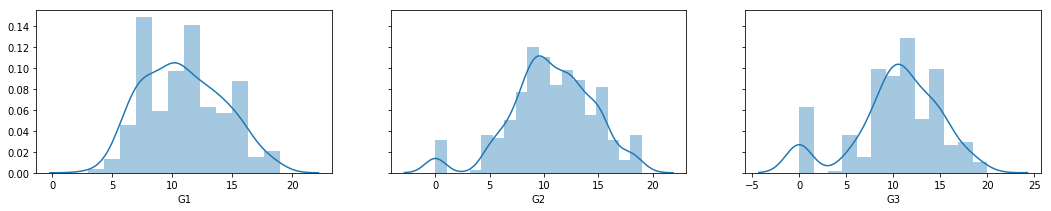

In [5]:
f, ax = plt.subplots(1, 3, figsize=(18, 3),sharey=True)
sns.distplot(mathdata.G1, ax=ax[0]);
sns.distplot(mathdata.G2, ax=ax[1]);
sns.distplot(mathdata.G3, ax=ax[2]);

Mostly students grade averages around 10 and there are few 0 values, looks like few students didn't take the test. Let's see how many rows have G3 = 0

In [6]:
mathdata[mathdata.G3 == 0].shape

(38, 33)

There are 33 students, these students probably didn't take final test, as we
need to get better understanding of G3 for the students who took final test, let's take them
out from the data set.

In [7]:
mathdata.drop(mathdata[mathdata.G3 == 0].index, inplace=True)

Let's get a general sense of effect of different features on final grade

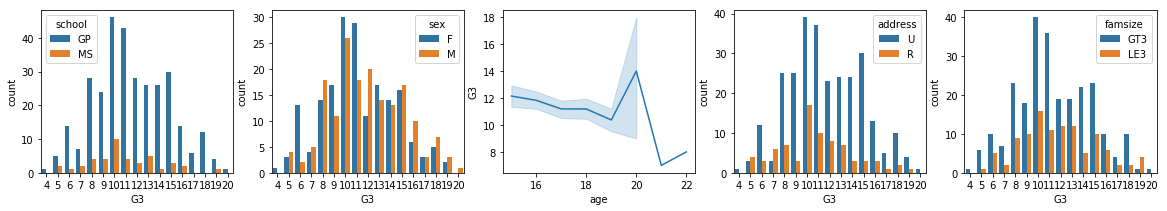

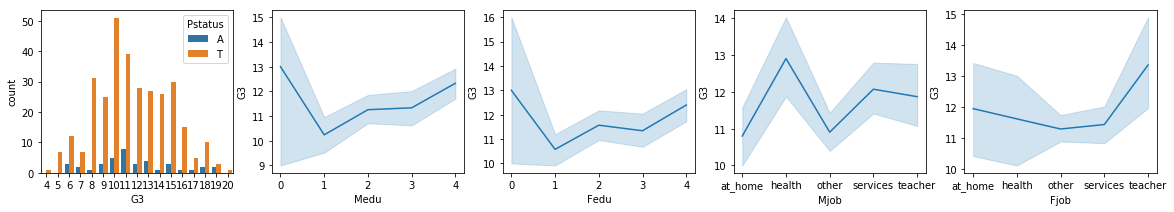

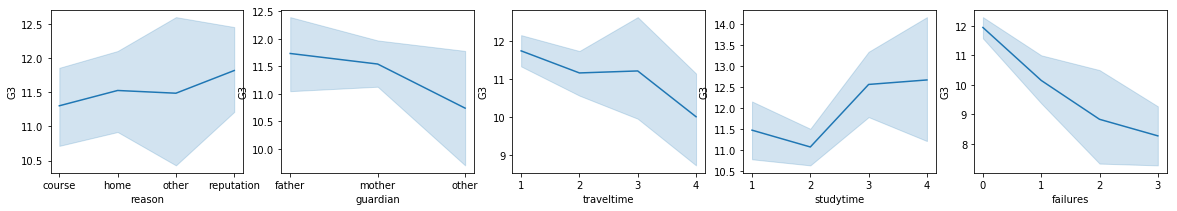

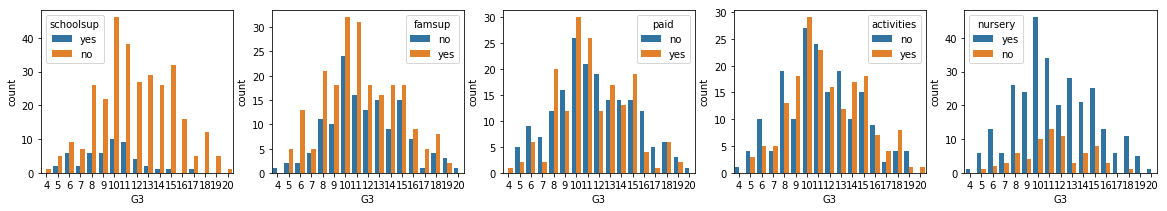

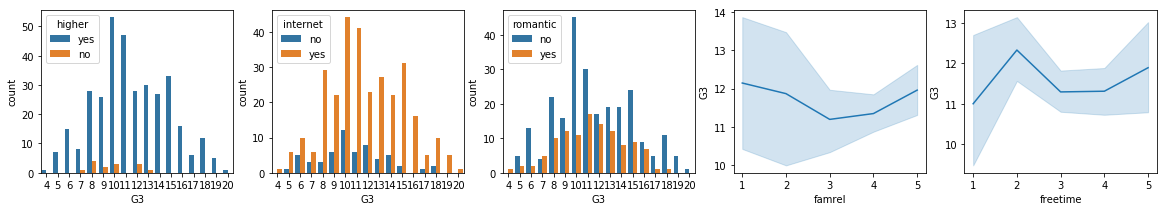

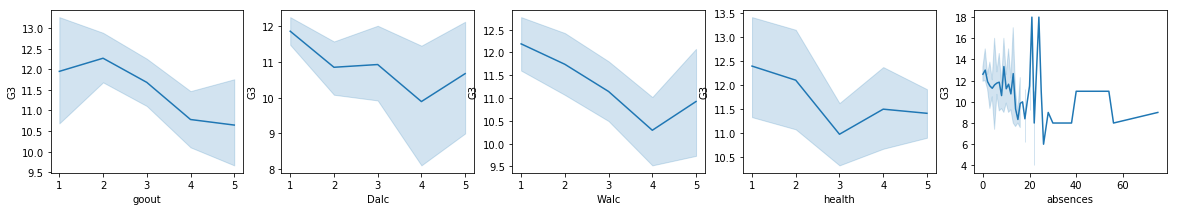

In [8]:
c = 0;
columns = mathdata.columns[:-1]
for i in range(6):
    f, ax = plt.subplots(1, 5, figsize=(20, 3));
    for j in range(5):
        # for columns with binary values show count plot, other wise lineplot for easier understanding
        if (mathdata[columns[c]].nunique() < 3):
            sns.countplot(hue=columns[c], x='G3', data=mathdata, ax=ax[j]);
        else:
            sns.lineplot(x=columns[c], y='G3', data=mathdata, ax=ax[j]);
        c = c+1;
plt.show();

Looks like student's age, Father's job as teacher, school's support,study time, failures, absences have some effect on final grade. Let's get correlation between all the variables and see if any of the features are highly correlated

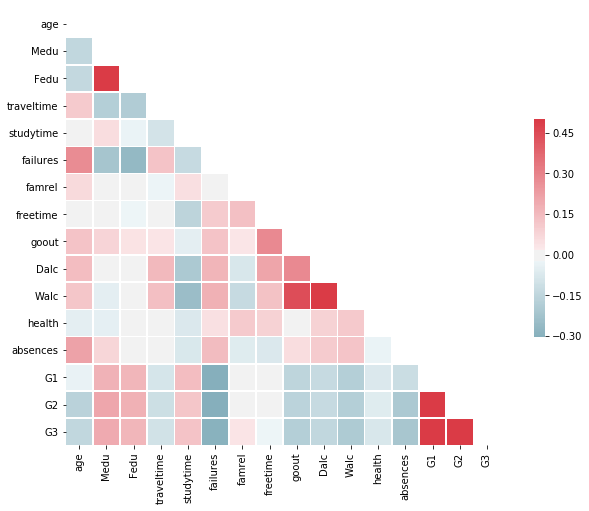

In [9]:
def CorrHeatmap(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12,8))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});
    return corr;

corr = CorrHeatmap(mathdata)

Check if any features are highly correlated (correlation greater than 0.95)

In [10]:
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
correlated = [column for column in upper.columns if any(upper[column] > 0.95) and column != 'G3']
print('Correlated columns: ', len(correlated))

Correlated columns:  0


No columns are correlated. Based on correlation heat map, other than G1, G2, looks like parents education, failures are moderately correlated to grades. 
We can look the correlation coefficients for concrete numbers.

In [11]:
# sort correlation
corr['G3'].apply(lambda x: abs(x)).sort_values(ascending=False)

G3            1.000000
G2            0.965583
G1            0.891805
failures      0.293831
absences      0.213129
Medu          0.190308
Walc          0.190054
goout         0.177383
Fedu          0.158811
Dalc          0.140690
age           0.140372
studytime     0.126728
traveltime    0.099785
health        0.081691
famrel        0.037711
freetime      0.021589
Name: G3, dtype: float64

### Regression 

For regression analysis, values have to be numeric, let's check categoorical columns and convert them to numerics.

In [12]:
#Let's define variables for feature and target columns
categorical_columns = mathdata.columns[mathdata.dtypes == object]
print('Column Unique value count')
for i in range(len(categorical_columns)):
    print(categorical_columns[i], '-', mathdata[categorical_columns[i]].nunique())

Column Unique value count
school - 2
sex - 2
address - 2
famsize - 2
Pstatus - 2
Mjob - 5
Fjob - 5
reason - 4
guardian - 3
schoolsup - 2
famsup - 2
paid - 2
activities - 2
nursery - 2
higher - 2
internet - 2
romantic - 2


For columns with two values, update them to 0/1 and use one hot encoding for other others

In [13]:
# convert columns with two values to 0 or 1 and multiple columns for greater than 2 values 
for i in range(len(categorical_columns)):
    colname = categorical_columns[i]
    firstunique = mathdata[colname].unique()[0]
    uniqueCount = mathdata[colname].nunique();
    if (uniqueCount  == 2 ):
        mathdata[colname] = (mathdata[colname] == firstunique)*1
    elif(uniqueCount > 2):
        df = pd.get_dummies(mathdata[colname], prefix=colname, drop_first=True)
        mathdata = mathdata.drop(columns=[colname])
        mathdata = pd.concat([mathdata, df], axis=1)

In [14]:
print('Total no. of columns', len(mathdata.columns))
print('Features variability')
skewdata = mathdata.skew() 
skewdata[skewdata > 2].sort_values(ascending=False)

Total no. of columns 42
Features variability


Fjob_health       4.126669
absences          3.609018
Fjob_teacher      3.301642
guardian_other    3.223551
Mjob_health       2.885238
failures          2.748099
reason_other      2.714880
Pstatus           2.515875
Dalc              2.146276
schoolsup         2.083098
dtype: float64

There are few columns with large range of data, we should standardize all data during regression. Let's get to the real thing -  modelling...

In [15]:
all_feature_columns =  [col for col in mathdata.columns if col not in ['G3']]
feature_columns_noG2 = [col for col in mathdata.columns if col not in [ 'G2', 'G3']]
feature_columns_noG1G2 = [col for col in mathdata.columns if col not in ['G1', 'G2', 'G3']]
metrics = ['Model', 'Feature Description', 'RMSE', 'R2 Score', 'Selected Features']
evalmetrics = pd.DataFrame(columns= metrics)

# Function to evaluate model metrics
def EvaluateModel(category, modelType, RMSE, Score, true_target, predicted_target, coeffs, columns):
    modelTitle = '{0} - RMSE:{1}, R2 Score:{2}'.format(modelType, round(RMSE,2), round(Score,2))
    important_features = pd.Series(data=coeffs,index=columns)
    important_features.sort_values(ascending=False,inplace=True)
    imp_features_display = important_features[:5].apply(lambda x:round(x,2)).to_csv(header=None, index=True).strip('\n').split('\n')
  
    global evalmetrics
    evalmetrics = evalmetrics.append({'Model':  modelType, 
                                    'Feature Description':category,
                                    'RMSE': RMSE, 
                                    'R2 Score':Score,
                                    'Selected Features': imp_features_display
                                }, ignore_index=True)
            
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4));    
    ax1.scatter(true_target, predicted_target, label='Actual vs Predicted');
    ax1.set(xlabel='Actual', ylabel='Predicted', title= modelTitle)
    ax2.set(title=modelType + ' - Feature Importance')
    important_features.plot(kind='bar', ax=ax2);

# Function will return Random Forest, Ridge, Lasso model name from estimator,
def getModelName(estimator):
    name = 'Random Forest'
    for k,v in estimator.get_params("reg").items():
        if ( k == 'reg'):
            t = type(v)
            if ( t is Lasso):
                name = 'Lasso'
            elif (t is Ridge):
                name = 'Ridge'
    return name
    
# Function to pick best regresion model from Ridge, Lasso, Random Forest models   
def GridSearchPredict(category, X_train, X_test, y_train, y_test, columns):
    alphas = [0.001, 0.1, 0.5, 1, 5, 10]
    pipe = Pipeline([("reg", LinearRegression())])
    search_space = ([
        {
            "reg": [Ridge()],
            "reg__alpha": alphas
        },
        {
            "reg": [Lasso()],
            "reg__alpha": alphas                      
        },
        {
            "reg": [RandomForestRegressor()],
            "reg__max_depth": [5,10]
        }
    ]);
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    gridsearchmse  = GridSearchCV(pipe, search_space, scoring='neg_mean_squared_error', cv=skf)
    best_model = gridsearchmse.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    RMSE= abs(best_model.best_score_)
    Score = r2_score(y_test, y_pred)
    modelType = getModelName(best_model.best_estimator_)
    print('Out of Ridge, Lasso, Random Forest regression -', modelType, 'performed best.')
    regressor = best_model.best_estimator_.named_steps['reg']
    
    if (modelType == 'Random Forest'):
        coeffs = regressor.feature_importances_
    else:
        coeffs = regressor.coef_

    EvaluateModel(category, modelType, RMSE, Score, y_test, y_pred, coeffs, columns)

Let's get the best 5 features that can Define function to perform regression based on given factors to predict target G3, calculate RMSE and plot graph between actual and predicted grades

In [16]:
features = mathdata.loc[:, feature_columns_noG1G2]
target = mathdata['G3']

# Create a linear regression
ols = LinearRegression()
# Recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")

rfecv.fit(features, target)
rfecv.transform(features)

# Number of best features
bestfeaturecount = rfecv.n_features_
bestfeaturesdf = pd.DataFrame({'Best': rfecv.support_, 'Ranking': rfecv.ranking_, 'Column': features.columns})
bestfeaturesdf[bestfeaturesdf.Best == True]

,Best,Ranking,Column
10,True,1,failures
11,True,1,schoolsup
26,True,1,Mjob_health
28,True,1,Mjob_services
33,True,1,Fjob_teacher


Looks like failures, school support and parent's certain jobs have effect on grade. Let's use decision tree regression as it's one of the simplistic modelling techinque and check predictions

In [17]:
bfcols = bestfeaturesdf[bestfeaturesdf.Best == True]['Column'].values.tolist()
best_features = mathdata.loc[:, bfcols]

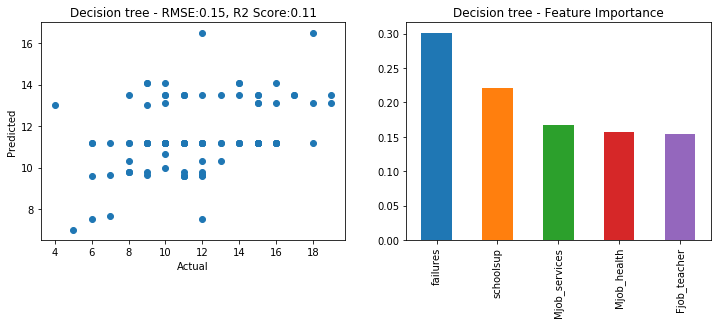

In [18]:
best_features_train, best_features_test, best_target_train, best_target_test = train_test_split(best_features, target, test_size=0.3) 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dtRegressor = DecisionTreeRegressor()
cv_results = cross_val_score(dtRegressor, best_features_train, best_target_train, cv=skf, n_jobs=-1) 
RMSE = cv_results.mean()
dtRegressor.fit(best_features_train, best_target_train)
y_pred = dtRegressor.predict(best_features_test)
RMSE = cv_results.mean()
Score = r2_score(best_target_test, y_pred)
EvaluateModel('Using 5 best features', 'Decision tree', RMSE, Score, 
              best_target_test, y_pred, 
              dtRegressor.feature_importances_,
              best_features_train.columns )

Score is very low, that means  it's tough to predict final grade based on just the best features using decision tree model. Let's see if standardizing them and using other models such as Ridge, Lasso, Random Forest regression helps. 

Standardize best features and build model

Out of Ridge, Lasso, Random Forest regression - Ridge performed best.


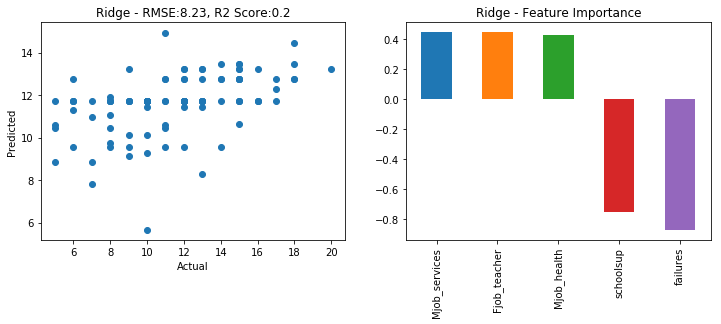

In [19]:
scaler = StandardScaler()
best_features_standardized = scaler.fit_transform(best_features)
bfs_train, bfs_test, bfst_train, bfst_test = train_test_split(best_features_standardized, target, test_size=0.3) 
GridSearchPredict('Using 5 best features', bfs_train, bfs_test, bfst_train, bfst_test, bfcols)

The score isn't great, let's try all features and build model

Out of Ridge, Lasso, Random Forest regression - Lasso performed best.


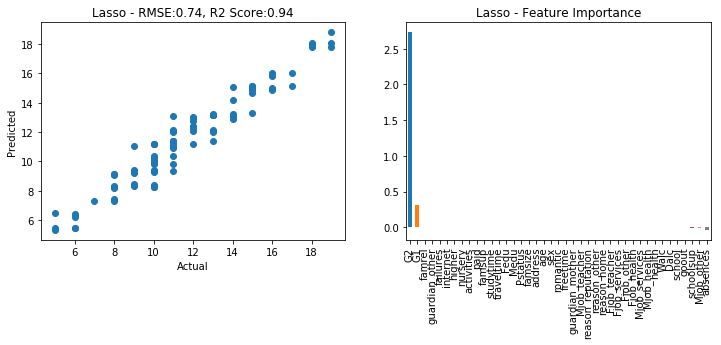

In [20]:
scaler = StandardScaler()
features_all = scaler.fit_transform(mathdata.loc[:, all_feature_columns])
features_all_train, features_all_test, target_all_train, target_all_test = train_test_split(features_all, target, test_size=0.3)  
GridSearchPredict('Including G1, G2', features_all_train, features_all_test, target_all_train, target_all_test, all_feature_columns)

G2 is a good predictor, let's take out G2 and see if final grade G3 can be predicted

Out of Ridge, Lasso, Random Forest regression - Lasso performed best.


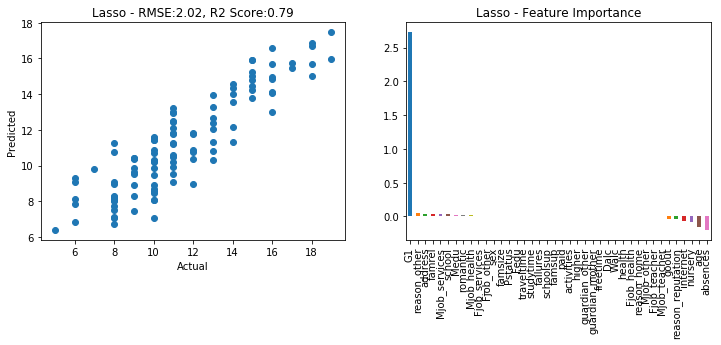

In [21]:
scaler = StandardScaler()
features_noG2 = scaler.fit_transform(mathdata.loc[:, feature_columns_noG2])
features_noG2_train, features_noG2_test, target_noG2_train, target_noG2_test = train_test_split(features_noG2, target, test_size=0.3)  
GridSearchPredict('Excluding G2', features_noG2_train, features_noG2_test, target_noG2_train, target_noG2_test, feature_columns_noG2)

Let's take G1 out too and try predicting G3

Out of Ridge, Lasso, Random Forest regression - Lasso performed best.


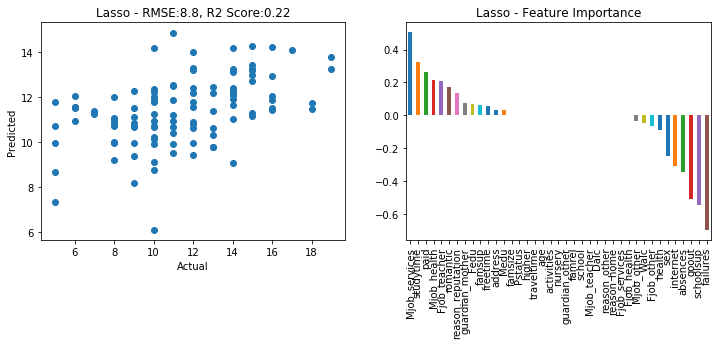

In [22]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(mathdata.loc[:,feature_columns_noG1G2])
std_features_train, std_features_test, std_target_train, std_target_test = train_test_split(features_standardized, target, test_size=0.3) 
GridSearchPredict('Excluding G1, G2', std_features_train, std_features_test, std_target_train, std_target_test, feature_columns_noG1G2)

Summary of all the models that we've run. R2 score is the accuracy of prediction.

In [23]:
pd.set_option('display.max_colwidth', -1)  # or 199
evalmetrics.sort_values(by='R2 Score', ascending=False)

,Model,Feature Description,RMSE,R2 Score,Selected Features
2,Lasso,"Including G1, G2",0.736051,0.941996,"[G2,2.73, G1,0.31, famrel,0.01, guardian_other,-0.0, failures,-0.0]"
3,Lasso,Excluding G2,2.015533,0.794048,"[G1,2.73, reason_other,0.05, address,0.04, famrel,0.04, Mjob_services,0.04]"
4,Lasso,"Excluding G1, G2",8.798699,0.219325,"[Mjob_services,0.51, studytime,0.32, paid,0.26, Mjob_health,0.21, Fjob_teacher,0.21]"
1,Ridge,Using 5 best features,8.225099,0.202839,"[Mjob_services,0.45, Fjob_teacher,0.45, Mjob_health,0.43, schoolsup,-0.75, failures,-0.87]"
0,Decision tree,Using 5 best features,0.148744,0.114763,"[failures,0.3, schoolsup,0.22, Mjob_services,0.17, Mjob_health,0.16, Fjob_teacher,0.15]"


### Conclusion

#### The prediction accuracy decreases as we remove G2 and G1. Hence dinal grade can be highly predicted from Grade 2 and moderately from Grade 1 but it is hard to without those two grades. 

#### As an extension to the project, the grades range can be divided into groups for e.g., 0-5 - Level 1, 6-8 as Level 2, 10-12 as Level 3 and  make this a classification problem and predict grade levels.